In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/synthetic_online_retail_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [4]:
df.sample(10)

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
67,76490,2024-12-17,362,30,Home & Living,Vase,5,307.04,Cash on Delivery,Roymouth,NaN,F,48
862,46834,2024-06-24,506,10,Electronics,Smartphone,5,365.33,Cash on Delivery,Charlesview,3.0,M,24
597,19284,2024-07-28,944,20,Fashion,T-shirt,5,162.45,Cash on Delivery,Phillipsport,4.0,F,52
656,25091,2025-01-30,766,50,Sports & Outdoors,Tent,5,119.75,Cash on Delivery,Port Laurenfort,5.0,F,20
932,69895,2024-04-27,848,20,Fashion,Pants,3,435.72,Credit Card,South Carolynchester,5.0,M,50
532,61358,2025-02-26,439,20,Fashion,T-shirt,5,476.53,Bank Transfer,Port Paul,4.0,F,51
841,42739,2024-09-29,149,10,Electronics,Laptop,5,486.90,Credit Card,Jenniferville,5.0,M,43
993,94141,2024-09-01,701,20,Fashion,Skirt,4,270.32,Bank Transfer,North Jeannemouth,5.0,M,48
215,27123,2024-12-27,144,20,Fashion,Dress,3,162.70,Bank Transfer,Saunderston,5.0,F,18
79,20770,2024-11-01,941,10,Electronics,Smartphone,2,391.43,Credit Card,Moranland,NaN,NaN,44


In [5]:
duplicates_count = df.duplicated().sum()
duplicates_count

0

In [6]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

In [7]:
df["gender"] = df["gender"].fillna("Unknown")

In [8]:
df["review_score"] = df["review_score"].where(df["review_score"].notna(), np.nan)

In [9]:
df.isnull().sum()


customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender              0
age                 0
dtype: int64

In [10]:
sns.set_theme(style="darkgrid")

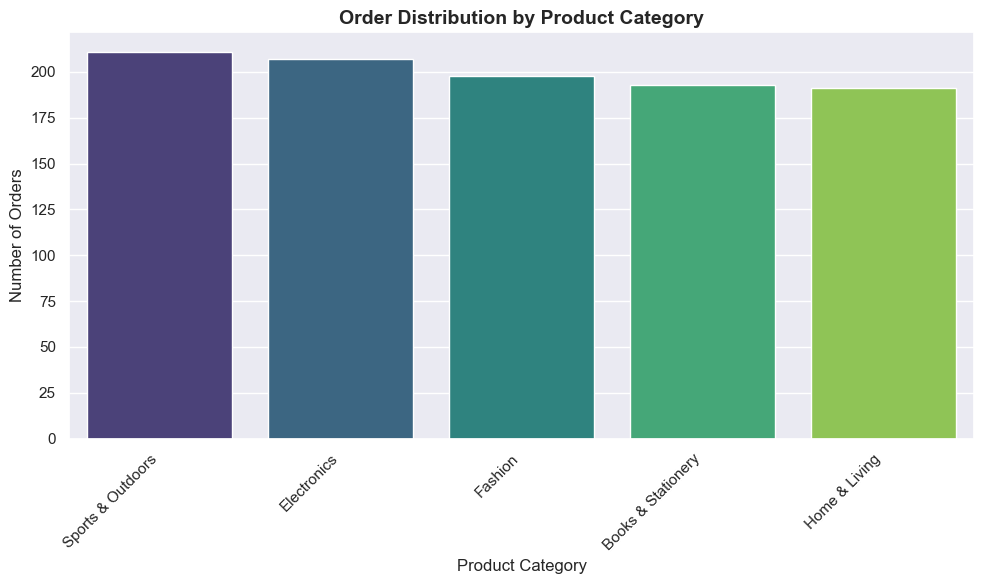

In [11]:
category_counts = df["category_name"].value_counts().reset_index()
category_counts.columns = ["category_name", "order_count"]
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_counts,
    x="category_name",
    y="order_count",
    hue="category_name",
    palette="viridis"
)
plt.title("Order Distribution by Product Category", fontsize=14, weight="bold")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

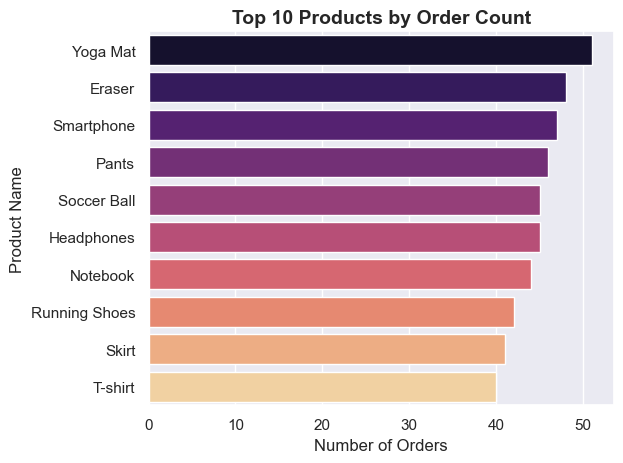

In [12]:
top_products = df["product_name"].value_counts().head(10).reset_index()
top_products.columns = ["product_name", "order_count"]
sns.barplot(data=top_products,
            x='order_count',
            y='product_name',
            hue='product_name',
            palette='magma',
            legend=False
           )
plt.title("Top 10 Products by Order Count", fontsize=14, weight="bold")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")

plt.tight_layout()
plt.show()

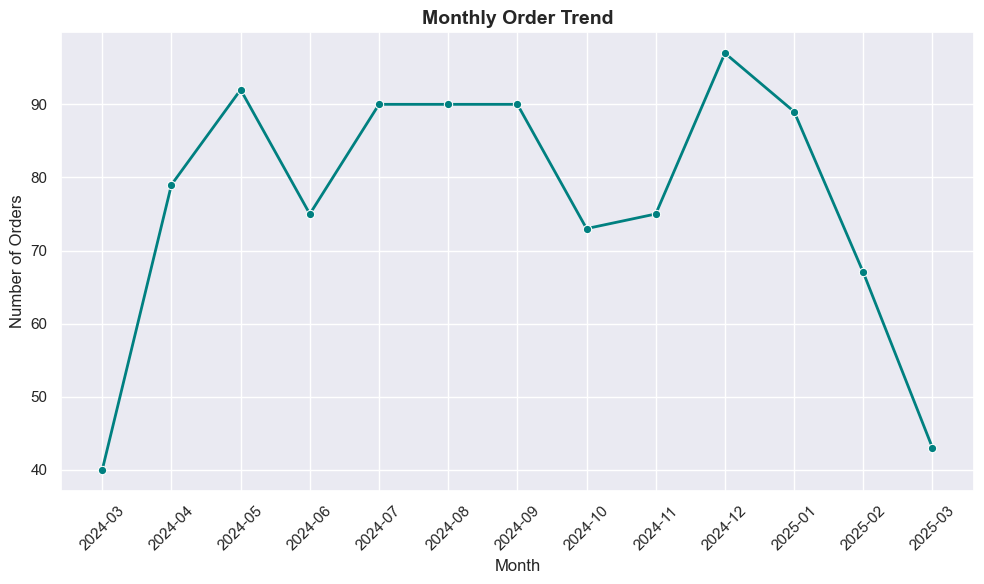

In [13]:
df["order_month"] = df["order_date"].dt.to_period("M").astype(str)
monthly_orders=df.groupby('order_month').size().reset_index(name='order_count')
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_orders,
    x="order_month",
    y="order_count",
    marker="o",
    linewidth=2,
    color="teal"
)
plt.title("Monthly Order Trend", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
name='online_retail_cleaned.csv'
df.to_csv(name,index=False)
print(f'Cleaned dataset saved as {name}, ready to explore further!')

Cleaned dataset saved as online_retail_cleaned.csv, ready to explore further!
